In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import nmc_verification.nmc_vf_base as nvb
import nmc_verification.nmc_vf_method as nvm
import nmc_verification.nmc_vf_product as nvp
import numpy as np
import datetime
import copy
import matplotlib.pyplot as plt
import time
import pandas as pd
import math
import matplotlib as mpl

In [2]:
para= {
    "ip_port_file":r"H:\test_data\input\nvb\ip_port.txt",
    "local_binary_dir":"O:/data/mdfs",
    "local_sta_dir": "O:/data/sta",
    "local_grid_dir":"O:/data/grid",
    "max_save_day":7,
    }

最近一周温度预报温度性对比

In [19]:
dir_ob = "SURFACE\QC_BY_FSOL\TMP_ALL_STATION/YYYYMMDDHH0000.000"
now = datetime.datetime.now()
today = datetime.datetime(now.year,now.month,now.day,8,0)
station = nvb.read_station(nvb.station_国家站)
id_dict = {"北京":54511,"哈尔滨":50953, "武汉":57494,"广州":59287}
id_list = []
for key in id_dict.keys():
    id_list.append(id_dict[key])
station_city = nvb.in_id_list(station,id_list)
veri_day_count = 10
time1 = today - datetime.timedelta(days = veri_day_count)

In [86]:
#读取观测数据
ob_list = []
time2 = time1
while time2 <= now:
    path = nvb.tool.path_tools.get_path(dir_ob,time2)
    sta = nvp.application.read_stadata(para,path,station = station_city)
    ob_list.append(sta)
    time2 = time2 + datetime.timedelta(hours = 3)
ob_all = pd.concat(ob_list,axis = 0)

O:/data/mdfs/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200218080000.000
601
O:/data/mdfs/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200218110000.000
601
O:/data/mdfs/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200218140000.000
601
O:/data/mdfs/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200218170000.000
601
O:/data/mdfs/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200218200000.000
601
O:/data/mdfs/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200218230000.000
601
O:/data/mdfs/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200219020000.000
601
O:/data/mdfs/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200219050000.000
601
O:/data/mdfs/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200219080000.000
601
O:/data/mdfs/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200219110000.000
601
O:/data/mdfs/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200219140000.000
601
O:/data/mdfs/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200219170000.000
601
O:/data/mdfs/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200219200000.000
601
O:/data/mdfs/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200219230000.000
601
O:/dat

In [64]:
#读取模式数据
dir_scmoc = r"NWFD_SCMOC\TMP\2M_ABOVE_GROUND\YYMMDDHH.TTT"
scmoc_list = []
time2 = time1 
while time2 <= now:
    for dh in range(3,121,3):
        path = nvb.tool.path_tools.get_path(dir_scmoc,time2,dh)
        sta = nvp.application.read_stadata_from_griddata(para,path,station_city)
        nvb.set_stadata_coords(sta,time = time2,dtime = dh,level = 0)
        nvb.set_stadata_names(sta,["scmoc"])
        scmoc_list.append(sta)
    time2 = time2 + datetime.timedelta(hours = 12)
scmoc_all = pd.concat(scmoc_list,axis = 0)

O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200218/20021808.003.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200218/20021808.006.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200218/20021808.009.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200218/20021808.012.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200218/20021808.015.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200218/20021808.018.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200218/20021808.021.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200218/20021808.024.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200218/20021808.027.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200218/20021808.030.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200218/20021808.033.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200218/20021808.036.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200218/20021808.039.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200218/20021808.042.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABO

O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20021920.051
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20021920.054
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20021920.057
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20021920.060
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20021920.063
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20021920.066
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20021920.069
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20021920.072
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20021920.075
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20021920.078
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20021920.081
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20021920.084
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20021920.087
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20021920.090
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20021920.093
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20021920.096
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20021920.099
O:/data/mdfs/NWFD_SCMOC\TMP\2M_

O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022108.120
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022120.003
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022120.006
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022120.009
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022120.012
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022120.015
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022120.018
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022120.021
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022120.024
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022120.027
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022120.030
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022120.033
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022120.036
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022120.039
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022120.042
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022120.045
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022120.048
O:/data/mdfs/NWFD_SCMOC\TMP\2M_

O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022308.072
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022308.075
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022308.078
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022308.081
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022308.084
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022308.087
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022308.090
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022308.093
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022308.096
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022308.099
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022308.102
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022308.105
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022308.108
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022308.111
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022308.114
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022308.117
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022308.120
O:/data/mdfs/NWFD_SCMOC\TMP\2M_

O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022508.027
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022508.030
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022508.033
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022508.036
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022508.039
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022508.042
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022508.045
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022508.048
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022508.051
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022508.054
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022508.057
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022508.060
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022508.063
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022508.066
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022508.069
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022508.072
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022508.075
O:/data/mdfs/NWFD_SCMOC\TMP\2M_

O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022620.099
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022620.102
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022620.105
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022620.108
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022620.111
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022620.114
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022620.117
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022620.120
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022708.003
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022708.006
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022708.009
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022708.012
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022708.015
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022708.018
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022708.021
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022708.024
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20022708.027
O:/data/mdfs/NWFD_SCMOC\TMP\2M_

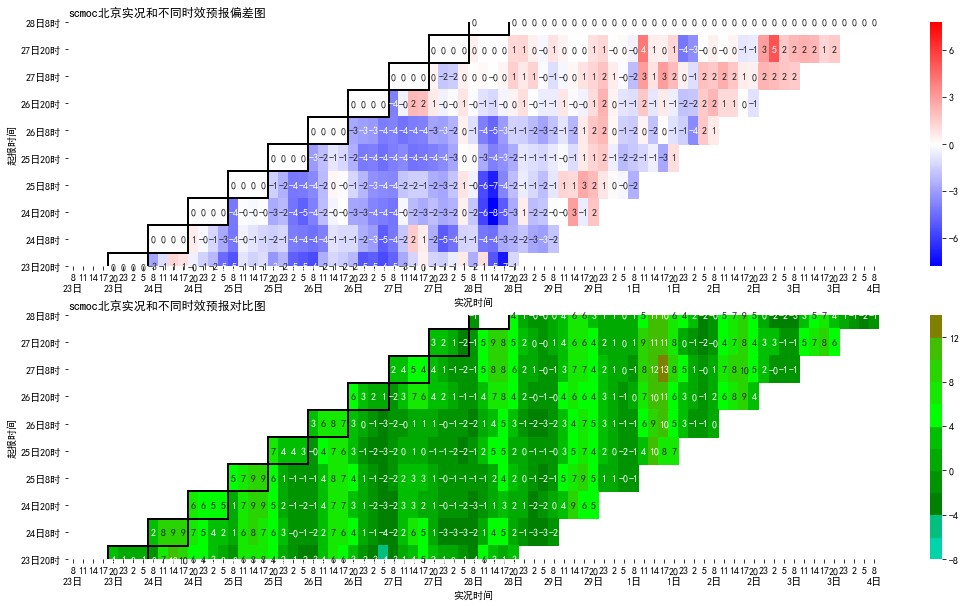

In [74]:
#开始检验
key ="北京"
sta_ob = nvb.in_id_list(ob_all,[id_dict[key]])
sta_scmoc = nvb.in_id_list(scmoc_all,[id_dict[key]])
nvb.set_stadata_names(sta_scmoc,["scmoc"+key])
nvp.temp_ob_and_multi_time_fo(sta_ob,sta_scmoc)

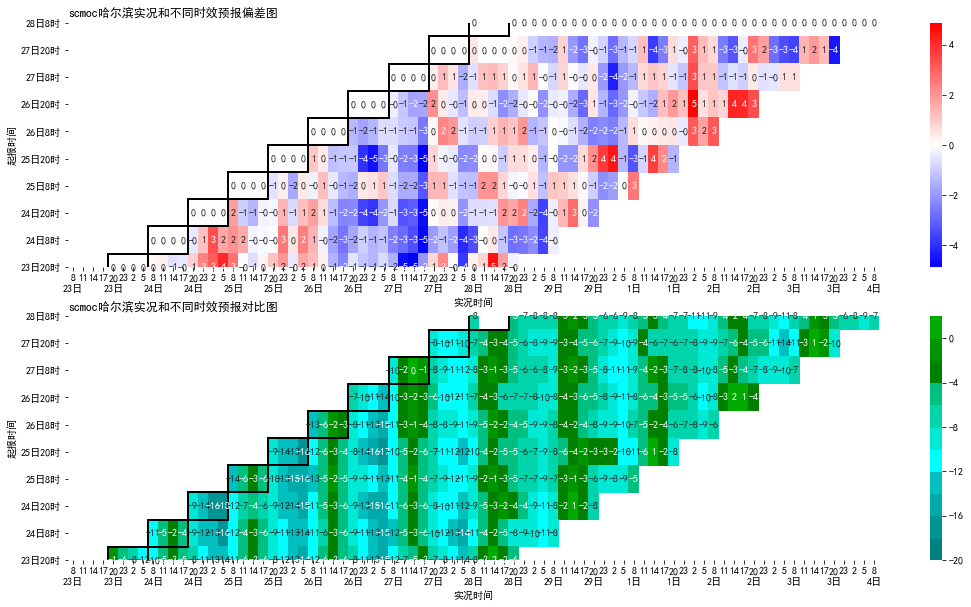

In [75]:
key ="哈尔滨"
sta_ob = nvb.in_id_list(ob_all,[id_dict[key]])
sta_scmoc = nvb.in_id_list(scmoc_all,[id_dict[key]])
nvb.set_stadata_names(sta_scmoc,["scmoc"+key])
nvp.temp_ob_and_multi_time_fo(sta_ob,sta_scmoc)

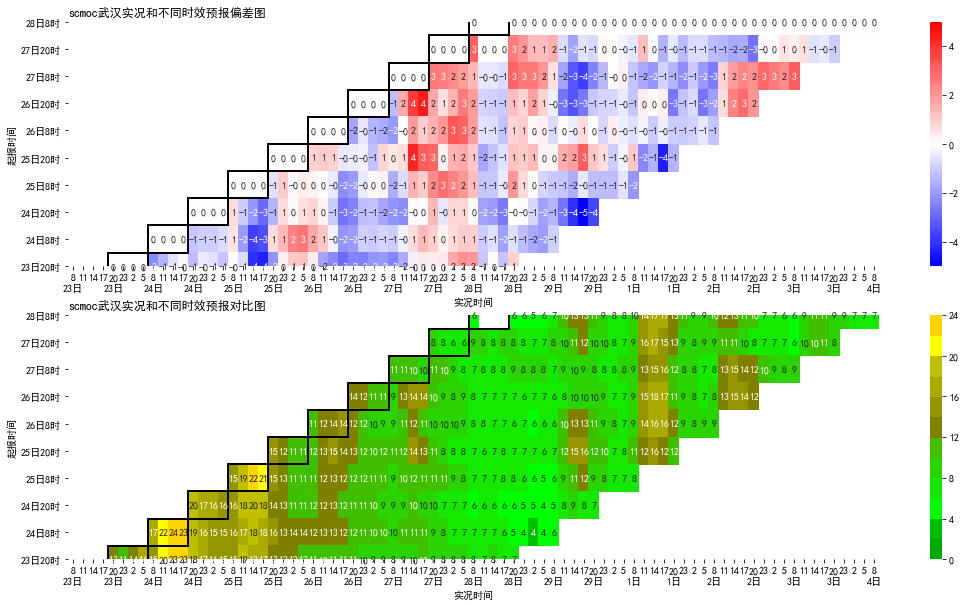

In [72]:
key ="武汉"
sta_ob = nvb.in_id_list(ob_all,[id_dict[key]])
sta_scmoc = nvb.in_id_list(scmoc_all,[id_dict[key]])
nvb.set_stadata_names(sta_scmoc,["scmoc"+key])
nvp.temp_ob_and_multi_time_fo(sta_ob,sta_scmoc)

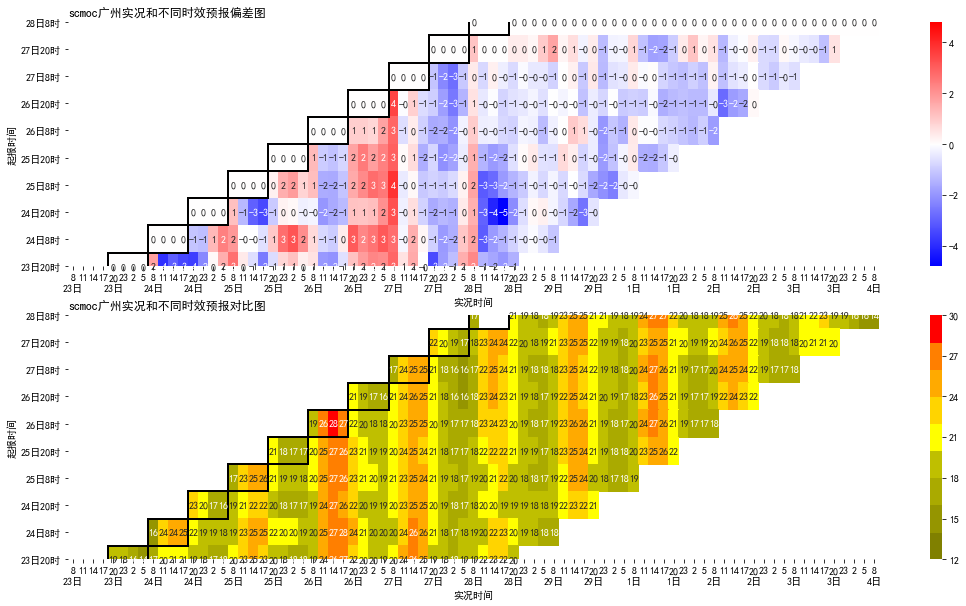

In [71]:
key ="广州"
sta_ob = nvb.in_id_list(ob_all,[id_dict[key]])
sta_scmoc = nvb.in_id_list(scmoc_all,[id_dict[key]])
nvb.set_stadata_names(sta_scmoc,["scmoc"+key])
nvp.temp_ob_and_multi_time_fo(sta_ob,sta_scmoc)

In [91]:
sta_all = nvb.combine_on_obTime_id(ob_all,[scmoc_all])

In [134]:
import nmc_verification
import seaborn as sns
def get_group_name(group_list_list):
    group_name = []
    for group_list in group_list_list:
        if isinstance(group_list,list):
            str1 = str(group_list)
            if len(str1)<10:
                str2 = str1
            else:
                str2 = str1[0:3]+"..."+str1[-3:]
        else:
            str2 = str(group_list)
        group_name.append(str2)
    return group_name
def error_boxplot(sta_ob_and_fos,threshold,group_by,group_list_list = None,save_dir = None,title = None,group_name_list = None):
    sta_ob_and_fos_list, group_list_list1 = nmc_verification.nmc_vf_base.fun.group(sta_ob_and_fos, group_by, group_list_list)
    if group_name_list is None:
        group_name_list = get_group_name(group_list_list1)

    maxlen = 0
    for i in range(len(group_list_list1)):
        if (len(sta_ob_and_fos_list[i].index) > maxlen):
            maxlen = len(sta_ob_and_fos_list[i].index)

    dfdata = {
    }
    for i in range(len(group_list_list1)):
        dat = np.zeros(maxlen)
        len1 = len(sta_ob_and_fos_list[i].index)
        dat[0:len1] =  sta_ob_and_fos_list[i].values[:,-1] - sta_ob_and_fos_list[i].values[:,-2]
        dfdata[group_name_list[i]] = dat
    dfdata = pd.DataFrame(dfdata)

    sns.boxplot(data=dfdata, linewidth=0.5,fliersize=1.0,color = "skyblue")
    plt.ylabel("value")
    
    pass

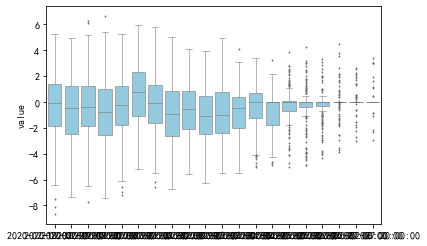

In [135]:
error_boxplot(sta_all,2,"time")

In [115]:
sta_all

,level,time,dtime,id,lon,lat,data0,scmoc
0,0,2020-02-18 08:00:00,3,57494,114.05,30.60,11.100000,11.160615
1,0,2020-02-18 08:00:00,3,50953,126.57,45.93,-7.900000,-7.354043
2,0,2020-02-18 08:00:00,3,59287,113.48,23.22,14.000000,15.003520
3,0,2020-02-18 08:00:00,3,54511,116.47,39.80,7.000000,6.933771
4,0,2020-02-18 20:00:00,3,57494,114.05,30.60,8.000000,6.740004
5,0,2020-02-18 20:00:00,3,50953,126.57,45.93,-10.100000,-13.064386
6,0,2020-02-18 20:00:00,3,59287,113.48,23.22,7.100000,9.324797
7,0,2020-02-18 20:00:00,3,54511,116.47,39.80,-1.100000,-0.517995
8,0,2020-02-19 08:00:00,3,57494,114.05,30.60,12.800000,12.359990
9,0,2020-02-19 08:00:00,3,50953,126.57,45.93,-4.100000,-5.318796
